# Exploración aquí:

In [44]:
# - Importación del set de datos:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

# - Guardado:

rutg = '../data/raw/dataset.csv'

# - Lectura:

df = pd.read_csv(url, delimiter=';')
df.to_csv(rutg, index=False)
print("El archivo fue guardado en la ruta:", rutg)

# - Vista previa:

df

El archivo fue guardado en la ruta: ../data/raw/dataset.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [45]:
# - Importación de librerías:

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [46]:
df.drop(['day_of_week', 'duration', 'pdays', 'previous'], axis = 1, inplace = True)
df = df[~df[['housing', 'loan', 'marital']].isin(['unknown']).any(axis=1)]
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


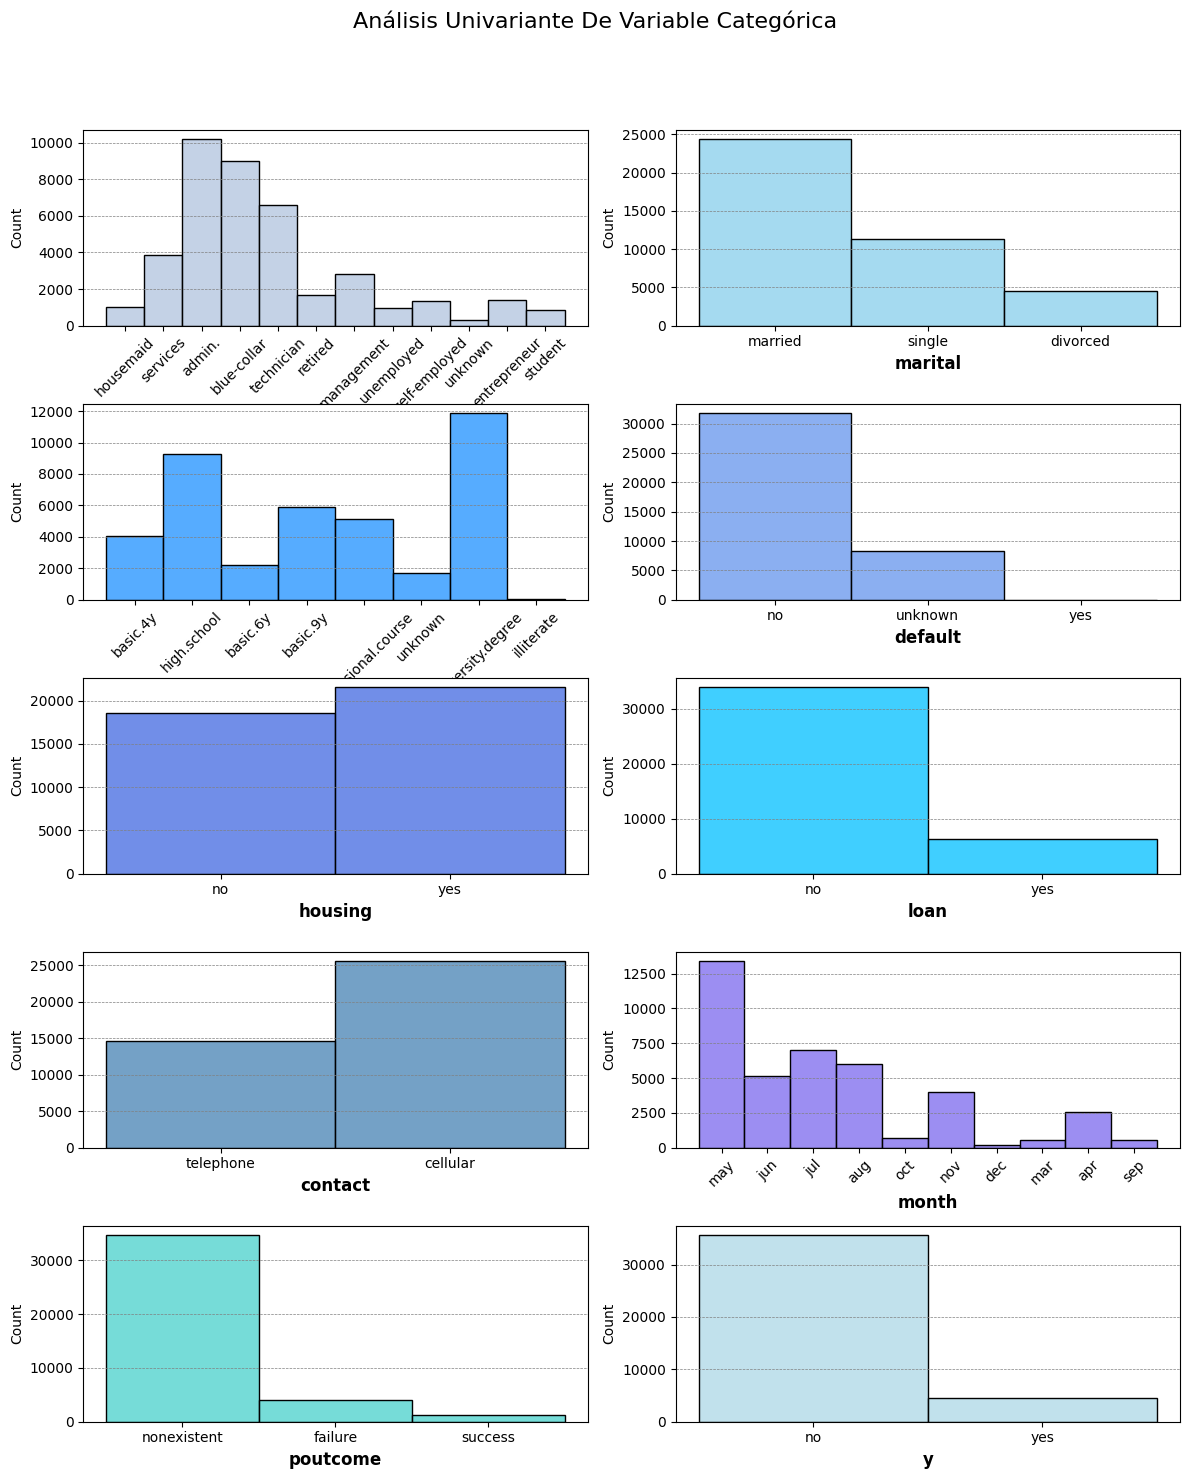

In [47]:
# - Parámetros:

fig, axis = plt.subplots(5, 2, figsize=(12, 15))  # Ajusté la altura para más espacio

# - Título:

fig.suptitle("Análisis Univariante De Variable Categórica", fontsize=16)

# - Distribución:

sns.histplot(ax=axis[0, 0], data=df, x='job', color='lightsteelblue')
sns.histplot(ax=axis[0, 1], data=df, x='marital', color='skyblue')
sns.histplot(ax=axis[1, 0], data=df, x='education', color='dodgerblue')
sns.histplot(ax=axis[1, 1], data=df, x='default', color='cornflowerblue')
sns.histplot(ax=axis[2, 0], data=df, x='housing', color='royalblue')
sns.histplot(ax=axis[2, 1], data=df, x='loan', color='deepskyblue')
sns.histplot(ax=axis[3, 0], data=df, x='contact', color='steelblue')
sns.histplot(ax=axis[3, 1], data=df, x='month', color='mediumslateblue')
sns.histplot(ax=axis[4, 0], data=df, x='poutcome', color='mediumturquoise')
sns.histplot(ax=axis[4, 1], data=df, x='y', color='lightblue')

# - Visualización:

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4)  # Aumenté la distancia entre filas (hspace)
for ax in axis.flat:
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
for ax in axis.flat:
    x_labels = ax.get_xticklabels()
    if len(x_labels) > 3:
        for label in x_labels:
            label.set_rotation(45)
for ax in axis.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')

plt.show()

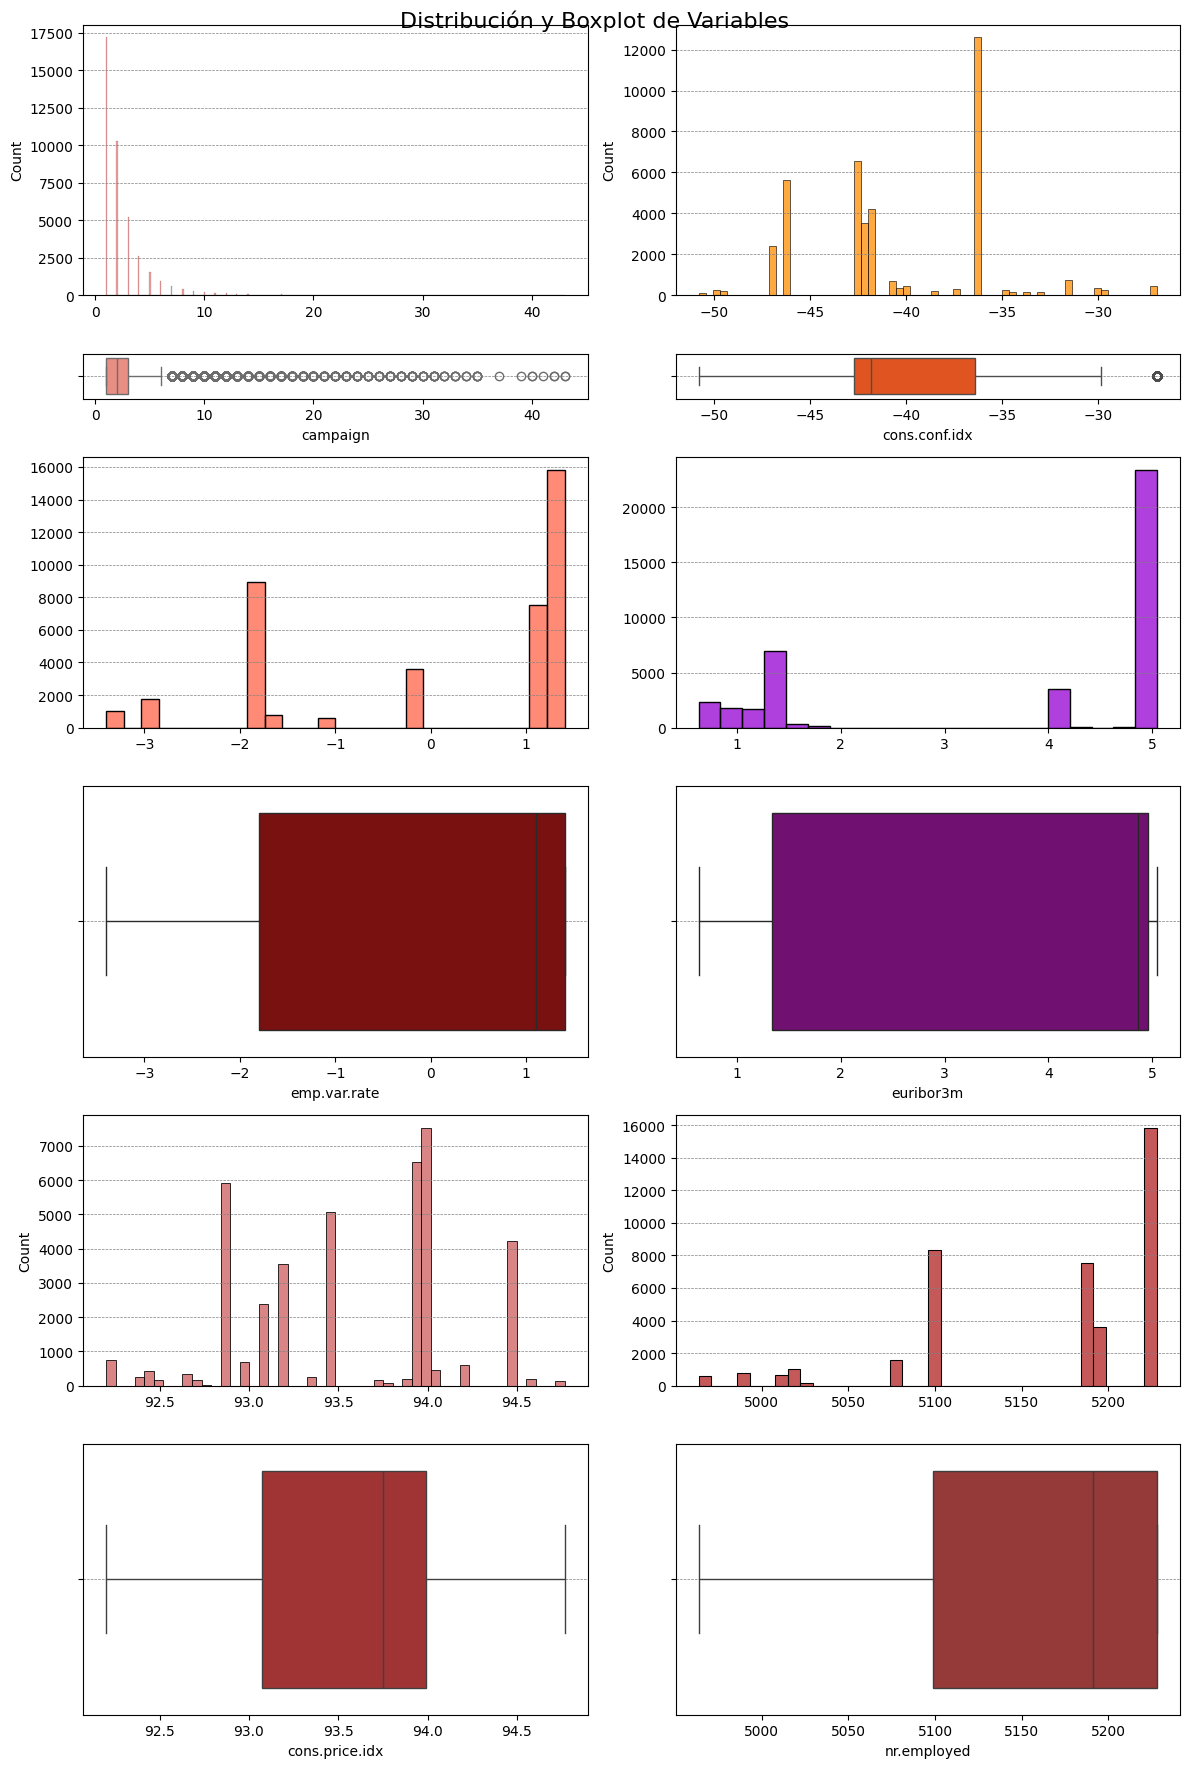

In [51]:
# - Parámetros:

fig, axis = plt.subplots(6, 2, figsize=(12, 18), gridspec_kw={'height_ratios': [6, 1, 6, 6, 6, 6]})

# - Título:

fig.suptitle("Distribución y Boxplot de Variables", fontsize=16)

# - Distribución:

sns.histplot(ax=axis[0, 0], data=df, x="campaign", color='lightcoral').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="campaign", color='salmon')
sns.histplot(ax=axis[2, 0], data=df, x="emp.var.rate", color='tomato').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="emp.var.rate", color='darkred')
sns.histplot(ax=axis[4, 0], data=df, x="cons.price.idx", color='indianred').set(xlabel=None)
sns.boxplot(ax=axis[5, 0], data=df, x="cons.price.idx", color='firebrick')
sns.histplot(ax=axis[0, 1], data=df, x="cons.conf.idx", color='darkorange').set(xlabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="cons.conf.idx", color='orangered')
sns.histplot(ax=axis[2, 1], data=df, x="euribor3m", color='darkviolet').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="euribor3m", color='purple')
sns.histplot(ax=axis[4, 1], data=df, x="nr.employed", color='firebrick').set(xlabel=None)
sns.boxplot(ax=axis[5, 1], data=df, x="nr.employed", color='brown')

# - Visualización:

plt.tight_layout()
for ax in axis.flat:
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()
